In [1]:
import re
import os
job_ids = [re.search('(\d){7}', dir).group() for dir in os.listdir("./shared/NORTH/") if re.search('data_(\d){7}', dir)]
job_ids.sort()
job_id = job_ids[-1]
print('job_id', job_id)

import numpy as np
from matplotlib import pyplot as plt
from boutdata import collect
import matplotlib.cm as cm
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
from boutdata.data import BoutData

path        = './shared/NORTH/data_' + job_id + '/'
bdata = BoutData(path)
outputs = bdata['outputs']
options  =bdata['options']

field_keys = bdata['outputs'].keys()

from matplotlib import rcParams
rcParams.update({
    "font.size": 16})
rcParams['axes.titlepad'] = 20

def get_option(*keys):
    from numpy import sqrt
    val = options
    try:
        for key in keys:
            val = val[key]
        return eval(str(val))
    except:
        print('Error reading option for keys: ', keys)
        return 0

def get_options(keys_list):
    vals = []
    for keys in keys_list:
        vals.append(get_option(*keys))
    return vals

R, Te0, N_nuclei, mp, B0, e, mxg, myg = get_options([
    ('north', 'R'), ('north', 'Te0'), ('north', 'N_nuclei'),
    ('north', 'mp'), ('north', 'B0'), ('north', 'e'),
    (['mxg']), (['myg'])])
nx_all, ny_all, nz_all = get_options([('mesh', 'nx'),('mesh', 'ny'),('mesh', 'nz')])
oci = get_option('north', 'oci')
rho_s = get_option('north', 'rho_s')
Lx = R/rho_s * rho_s
nx_inner = nx_all - 2*mxg
ny_inner = ny_all - 2*myg
nz_inner = nz_all

# Read data

field_list  = ['T', 'n', 'phi', 'vort','source_n', 'source_T','wall_shadow']
par_list    = ['t_array']

data, par, fast = {}, {}, {}

for _field in field_list:
    data[_field] = collect(_field, path = path, xguards = False)

for _par in par_list:
    par[_par] = collect(_par, path = path, xguards = False)

job_id 5145562


/home/niflheim/s173965/.local/lib/python3.9/site-packages/boutdata/data.py:732: AlwaysWarning: While building x, y, z coordinate arrays, an exception occured: name 'mxg' is not defined
Evaluating non-scalar options not available
  alwayswarn(


mxsub = 2 mysub = 1 mz = 256

nxpe = 40, nype = 1, npes = 40

Reading from 0: [2-3][0-0] -> [0-1][0-0]

Reading from 1: [2-3][0-0] -> [2-3][0-0]

Reading from 2: [2-3][0-0] -> [4-5][0-0]

Reading from 3: [2-3][0-0] -> [6-7][0-0]

Reading from 4: [2-3][0-0] -> [8-9][0-0]

Reading from 5: [2-3][0-0] -> [10-11][0-0]

Reading from 6: [2-3][0-0] -> [12-13][0-0]

Reading from 7: [2-3][0-0] -> [14-15][0-0]

Reading from 8: [2-3][0-0] -> [16-17][0-0]

Reading from 9: [2-3][0-0] -> [18-19][0-0]

Reading from 10: [2-3][0-0] -> [20-21][0-0]

Reading from 11: [2-3][0-0] -> [22-23][0-0]

Reading from 12: [2-3][0-0] -> [24-25][0-0]

Reading from 13: [2-3][0-0] -> [26-27][0-0]

Reading from 14: [2-3][0-0] -> [28-29][0-0]

Reading from 15: [2-3][0-0] -> [30-31][0-0]

Reading from 16: [2-3][0-0] -> [32-33][0-0]

Reading from 17: [2-3][0-0] -> [34-35][0-0]

Reading from 18: [2-3][0-0] -> [36-37][0-0]

Reading from 19: [2-3][0-0] -> [38-39][0-0]

Reading from 20: [2-3][0-0] -> [40-41][0-0]

Reading from 

In [2]:
thetas = np.linspace(0, 2 * np.pi, nz_inner)
rhos = np.linspace(1/(2*nx_inner), Lx+1/(2*nx_inner), nx_inner)

MovieWriter ffmpeg unavailable; using Pillow instead.


0
<Axes.ArtistList of 83 collections>


IndexError: list index out of range

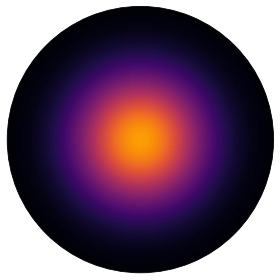

In [10]:
import pylab as plt
import numpy
import matplotlib.animation as animation
#plt.rcParams['animation.ffmpeg_path'] = r"C:\some_path\ffmpeg.exe"   # if necessary

def animate_data(data, cmap='inferno'):
    vmin = data.min()
    vmax = data.max()
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
    ax.set_rticks([])
    ax.set_xticks([])
    cont = ax.contourf(thetas, rhos, data[0, :, :], 100, cmap = cmap, vmin=vmin, vmax=vmax)    # first image on screen
    artists = [cont.collections]
    fig.tight_layout()

    # animation function
    def animate(i):
        print(i)
        print(ax.collections)
        # global cont
        for c in artists:
            c.remove()  # removes only the contours, leaves the rest intact
        cont = ax.contourf(thetas, rhos, data[i, :, :], 100, cmap = cmap, vmin=vmin, vmax=vmax)
        return [cont.collections]
    
    anim = animation.FuncAnimation(fig, animate, frames=4, interval=100)
    anim.save('./plots/' + job_id + '_test_animation_n.gif', fps=4)
    # plt.show()
    # anim = animation.FuncAnimation(fig, animate, frames=data.shape[0], repeat=False)
    # anim.save('./plots/animation.gif')

animate_data(data['n'].squeeze())

MovieWriter ffmpeg unavailable; using Pillow instead.


0
0
1
2
3


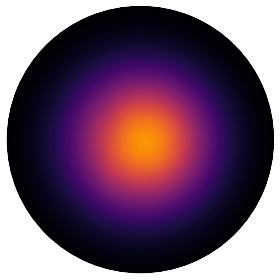

In [31]:
cmap='inferno'
field_data = data['n'].squeeze()
vmin = field_data.min()
vmax = field_data.max()
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.set_rticks([])
ax.set_xticks([])
cont = ax.contourf(thetas, rhos, field_data[0, :, :], 100, cmap = cmap, vmin=vmin, vmax=vmax)    # first image on screen
fig.tight_layout()

# animation function
def animate(i):
    print(i)
    global cont
    for c in cont.collections:
        c.remove()  # removes only the contours, leaves the rest intact
    cont = ax.contourf(thetas, rhos, field_data[i, :, :], 100, cmap = cmap, vmin=vmin, vmax=vmax)
    return cont

anim = animation.FuncAnimation(fig, animate, frames=4, interval=100, blit=True)
anim.save('./plots/' + job_id + '_test_animation_n.gif', fps=4)